# Introduction to Data Science
## Homework 5

Student Name: Fu Shang

Student Netid: fs1520
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

<font face='Arial' size='5'>Answer:</font><br>
If some classes in the training set is small and some features didn't occur in those classes, there will be zero-probability for that feature, while this results in zero-probability in the Naive Bayes since it's a part of the mutiply.So we could add a '1' to each class to avoid this bias. Since bias is E(Fc(ei)-y) and variance is E((Fc(ei)-F(ei))^2), by using the Laplace Smoothing, the total F(ei) won't change a lot, we can significantly decrease bias while almost without increasing variance. One example is in text classification, there are three classes C1, C2 and C3, while word X appeared 0, 450, 50 times in each class. Without Laplace Smoothing, the p(ei|c) is respectively 0,0.9 and 0.1 and the total probability will be zero. With Laplace smoothing, the p(ei|c) changes into 0.0020, 0.8966, 0.1014, which forms a sensible total probability.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
import numpy as np
import os
nowpath=os.path.abspath('.')
data = None
data=pd.read_csv(nowpath+'/imdb.csv',sep=',')
data=pd.DataFrame(data)

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [2]:
data['NumCmt']=((data['Class']=='P').astype('int64'))

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [3]:
from sklearn.cross_validation import train_test_split

X = data.loc[:,'Text']
Y = data.loc[:,'NumCmt']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=666)

E:\Programming\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

n_features=500
#TffV=TfidfVectorizer(max_df=0.95,min_df=2,max_features=n_features, #max_features
#                    ngram_range=(1, 2),binary=True,stop_words='english')
TffV=TfidfVectorizer(max_df=0.95,min_df=2,ngram_range=(1, 2),
                     binary=True,stop_words='english')
X_train_TffV=TffV.fit_transform(X_train)
CV=CountVectorizer(max_df=0.95,min_df=2,ngram_range=(1, 2),
                   binary=True,stop_words='english')
X_train_CV=CV.fit_transform(X_train)

In [5]:
X_test_TffV=TffV.transform(X_test)
X_test_CV=CV.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], color='navy', lw=2,linestyle= '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

LR_TffV=LogisticRegression()
LR_CV=LogisticRegression()
BNB_TffV=BernoulliNB()
BNB_CV=BernoulliNB()
LR_TffV.fit(X_train_TffV,Y_train)
LR_CV.fit(X_train_CV,Y_train)
BNB_TffV.fit(X_train_TffV,Y_train)
BNB_CV.fit(X_train_CV,Y_train)

# Code here

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [8]:
Y_LR_TffV=LR_TffV.predict(X_test_TffV)
Y_LR_TffV_Proba=LR_TffV.predict_proba(X_test_TffV)
Y_LR_CV=LR_CV.predict(X_test_CV)
Y_LR_CV_Proba=LR_CV.predict_proba(X_test_CV)
Y_BNB_TffV=BNB_TffV.predict(X_test_TffV)
Y_BNB_TffV_Proba=BNB_TffV.predict_proba(X_test_TffV)
Y_BNB_CV=BNB_CV.predict(X_test_CV)
Y_BNB_CV_Proba=BNB_CV.predict_proba(X_test_CV)

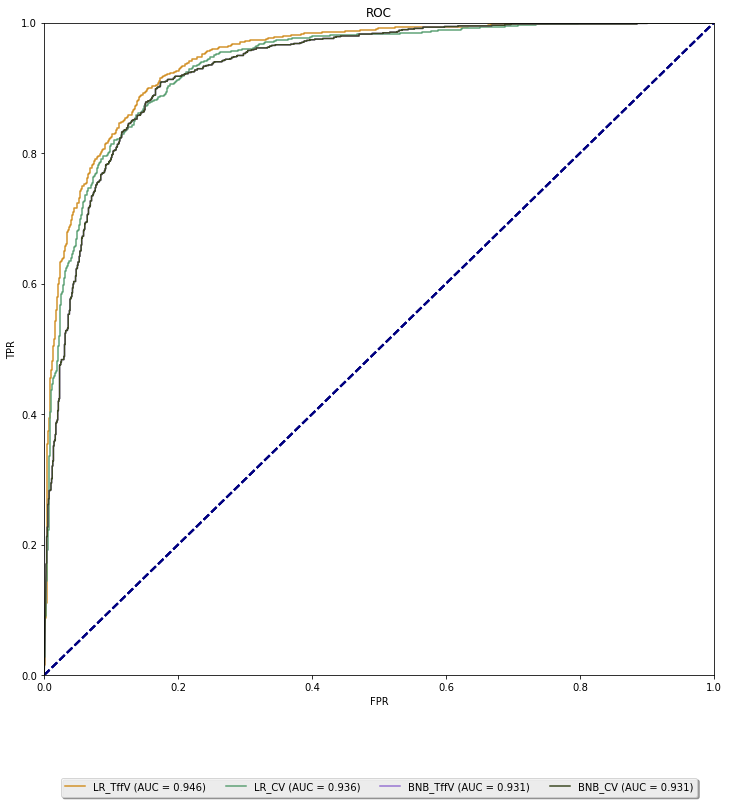

In [9]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (12, 12))
pc = plt.subplot(111)
feature_auc_dict = {}
feature_auc_dict[LR_TffV] = plotUnivariateROC(Y_LR_TffV_Proba[:,1], Y_test, 'LR_TffV')
feature_auc_dict[LR_CV] = plotUnivariateROC(Y_LR_CV_Proba[:,1], Y_test, 'LR_CV')
feature_auc_dict[BNB_TffV] = plotUnivariateROC(Y_BNB_TffV_Proba[:,1], Y_test, 'BNB_TffV')
feature_auc_dict[BNB_CV] = plotUnivariateROC(Y_BNB_CV_Proba[:,1], Y_test, 'BNB_CV')
box=pc.get_position()
pc.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
pc.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

1.Which model do you think does a better job? Why? <br>
<font face='Arial' size='5'>Answer:</font><br>
The result shows that Logistic Regression with the term-frequency-inverse- document-frequency vectorizer group works the best. It might because althouth the Bernoulli Naive Bayes is a simple and fast model, its inherent peformance is worse, makes its precision lower than other models such as the Logistic Regression classifier. The LR model performs better with a Tfidf Transformer on the original vectorizer, since the model could always perform better with a normalized dataset.<br><br>
2.Do any of the options perform identically? If so, can you explain why?<br>
<font face='Arial' size='5'>Answer:</font><br>
The Bernoulli Naive Bayes with Tfidf and count vectorizer has the same performance. This is because since we set the binary 'True', the Tfidf could cover the function of Laplace Smoothing which sets all non-zero term counts 1, to avoid zero-probabilities. However, the BernoulliNB model also has an 'alpha' parameter, which is defaultly set 1, to do the Laplace Smoothing. This means when dealing with the Count Vectorizer transformed data, BernoulliNB smoothes them the same way as the TfidfV did. In this case, the BNB model has the same input dataset after the 'alpha' parameter did its job. So the outputs and AUCs are completely the same.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [10]:
type(Y_test)

pandas.core.series.Series

In [11]:
# Code here to display 5 incorrect reviews.
i=0
j=0
for index,row in Y_test.iteritems():
    if (row==1)and(Y_LR_TffV[i]==0):
        print(index,X_test.loc[index]+'\n')
        j=j+1
    i=i+1
    if j>=10:
        break

7446 'All the folks who sit here and say that this movies weak link is the Ramones would probably say that Amadeus was ok if not for that irritating harpsichordist. Rock and Roll High School was centered around the Ramones. How anyone can watch this and not get a kick out of Joey Ramone eating bean sprouts backstage in an attempt to keep him in performing condition is obviously a wet blanket square daddy-o. Ms Trogar exploding white mice the hall patrols...instant classics. Nevermind the Riff Randell character. If you dont like the Ramones then you dont know rock and roll and you dont deserve to watch a movie called ROCK AND ROLL High School.'

2017 'If you want to learn something about the Spanish Civil War and about all the political details and intrigues let me tell you youve chosen the wrong film. This is a vision of the war as it happened in Majorca a small island off the coast of Spain. When a war like this happens in a small island that takes position for the traitor almost at o

<font face='Arial' size='5'>Explanation:</font><br>


For comment 7446, the language is filled with irony and presumes about the audiences who would also give negative appraises on other movies with similar theme. There are many negative words, as well as rarely used phrases, making the classifier hard to judge its true meaning.<br><br>
For comment 2017, the argument demonstrates great depth of thought, but it also needs more logistic analysis on all the sentences as a whole. Also the audience adulterated large amounts of personal experiences which won't make much sense. Considering the comment is longer than the most ones, it's hard to classify it for such models. What's more, there are many negative words such as death, kill, wrong, poor, etc.<br><br>
For comment 6896, the audience said that the film has many shortcomings and listed them, making the comment a seemingly negative one. The only reason why he/she gave a high score is the movie should be a "must see for Hartley or Henry Foll fan".<br><br>
For comment 2639, it's more like a retell rather than a comment except for the last sentence. The audience would just want to earn some exp. points. It's hard to say whether it's positive or negative.<br><br>
For comment 7429, the audience used the word "underappreciated", which is positive but might be rare in the learning dataset, making the classifier hard to judge. The languages below are full of names and unrelated sentiment. Words and phrases which could be used to classify is too little.